## 6.1.4 Generate Random Latitudes and Longitudes

In [1]:
import random

In [6]:
random.random()

0.4007624178405371

In [5]:
random.randint(-90, 90)

-63

In [3]:
random.randrange(-9,9,2)

7

In [4]:
random.uniform(-10,10)

3.8430560291195732

In [7]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90,89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [8]:
latitudes

[-33.94308813690743,
 -22.062109325173637,
 -69.47763976154762,
 -81.40171050954515,
 87.49420764295309,
 -87.34648646253942,
 56.49573913774837,
 -77.81913207219978,
 -67.33332415649146,
 -34.37765190530204]

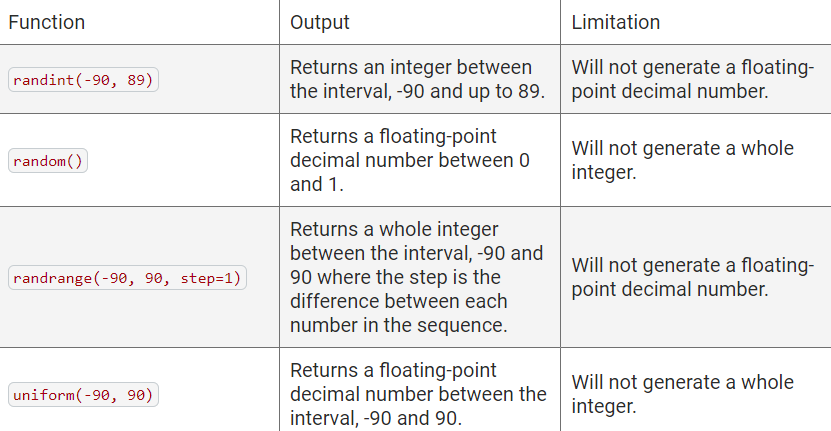

### NumPy and random Modules

The NumPy module to the random module to create an array of latitudes or longitudes between the lowest and highest values, or –90° and 90°, and –180° and 180°, respectively. To accomplish this, we'll use the uniform() function from the random module.

In [9]:
# Import the NumPy module
import numpy as np

In [11]:
np.random.uniform(-90.0, 90.0, size=50)

array([ -2.57680548,  32.43181277,  79.35017279,  -7.89077426,
       -85.83990375,  60.92269568,  -7.40895805,  28.62098772,
        39.80800523, -24.10608224, -28.70380394,  82.58408679,
       -75.98880978,  35.00747824,  68.31009403,  40.18117293,
        54.64413872, -10.00894485, -82.4776357 ,  42.99285458,
        55.79427555, -17.91188639,  87.69376749, -54.7367724 ,
        55.72614468, -84.32606286, -10.57148354,  56.36338924,
       -57.49406777, -28.6865135 , -17.66770187, -48.41107939,
       -14.48025365,  49.69967694,  -7.2114605 ,  24.80209114,
       -17.239622  ,  49.43995068, -28.66516238, -20.225506  ,
       -86.53140775,  74.24720149, -30.3530633 ,  48.70762561,
       -48.13460715,  11.88071677,  45.04000343,  -8.66398779,
       -53.71289003, -81.89668025])

In [12]:
import timeit

In [13]:
%timeit np.random.uniform(-90.0, 90.0, size=1500)

13.2 µs ± 71.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90,90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

# Call the function with 1500
%timeit latitudes(1500)

1.78 ms ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
def latitudes2():
    for i in range(1500):
        random.randint(-90, 90) + random.random()

%timeit latitudes2()

1.46 ms ± 7.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 6.4.1 Use Linear Regression

In [1]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [11]:
# Create equal number of latitudes and temperatures
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [12]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The std error is: {std_err}")

y = -0.45x + 92.94
The p-value is: 0.011
The std error is: 0.13734880392044935


In [13]:
# Calculate the regression line "y values" from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

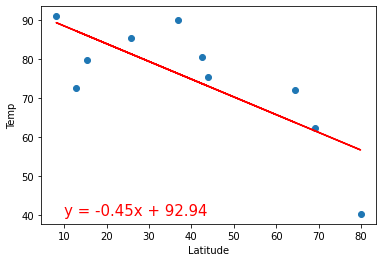

In [14]:
# import matplotlib
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(lats, temps)

# plot the regression line wiht the x-axis and the y coordinates based on the interecept and slope
plt.plot(lats, regress_values, "r")

# Annotate the text for the line equatin and add its coordinates
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()